In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('./input/schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
mcr = pd.read_csv('./input/multipleChoiceResponses.csv',
                    encoding="ISO-8859-1", low_memory=False)
mcr.shape

(16716, 228)

In [5]:
mcr.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [6]:
mcr.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

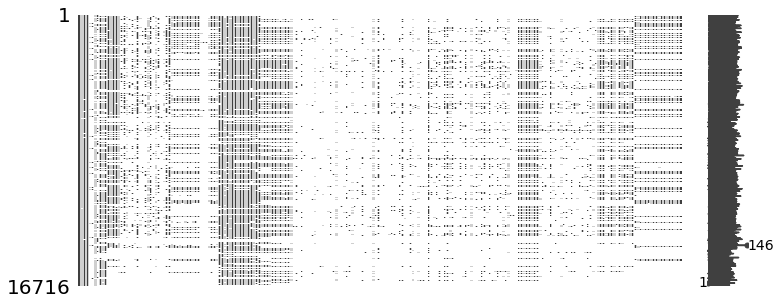

In [7]:
import missingno as msno

msno.matrix(mcr, figsize=(12, 5))

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

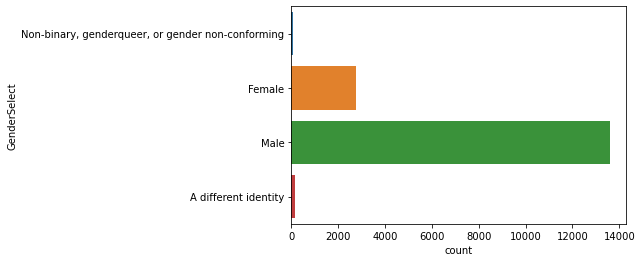

In [8]:
sns.countplot(y='GenderSelect', data=mcr)

In [9]:
con_df = pd.DataFrame(mcr['Country'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['res cnt', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,res cnt,country
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [10]:
mcr['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

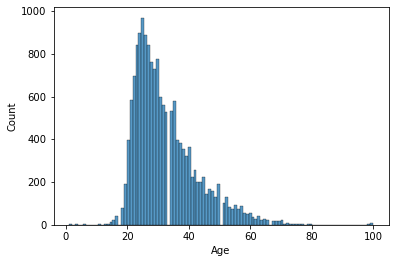

In [12]:
sns.histplot(mcr[mcr['Age'] > 0]['Age'])

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

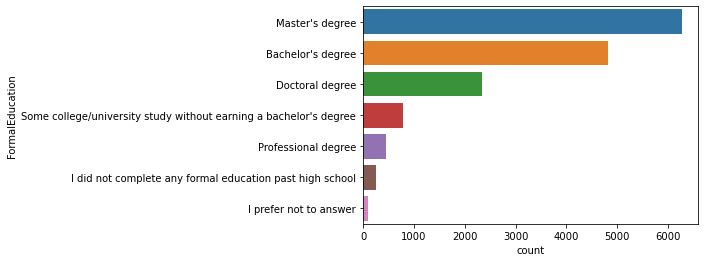

In [17]:
sns.countplot(y='FormalEducation', data=mcr, order=mcr['FormalEducation'].value_counts().index)

In [14]:
mcr_major_count = pd.DataFrame(
    mcr['MajorSelect'].value_counts())
mcr_major_percent = pd.DataFrame(
    mcr['MajorSelect'].value_counts(normalize=True))
mcr_major_df = mcr_major_count.merge(
    mcr_major_percent, left_index=True, right_index=True)
mcr_major_df.columns = ['응답 수', '비율']
mcr_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

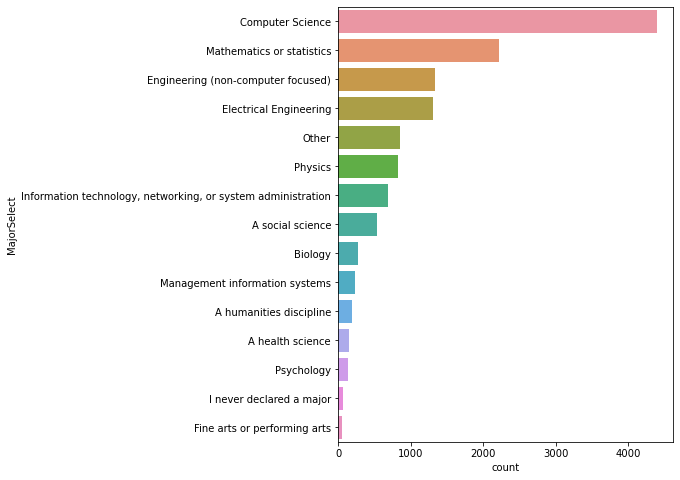

In [18]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcr, order=mcr['MajorSelect'].value_counts().index)

In [19]:
mcr_es_count = pd.DataFrame(
    mcr['EmploymentStatus'].value_counts())
mcr_es_percent = pd.DataFrame(
    mcr['EmploymentStatus'].value_counts(normalize=True))
mcr_es_df = mcr_es_count.merge(
    mcr_es_percent, left_index=True, right_index=True)
mcr_es_df.columns = ['res cnt', 'ratio']
mcr_es_df

,res cnt,ratio
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

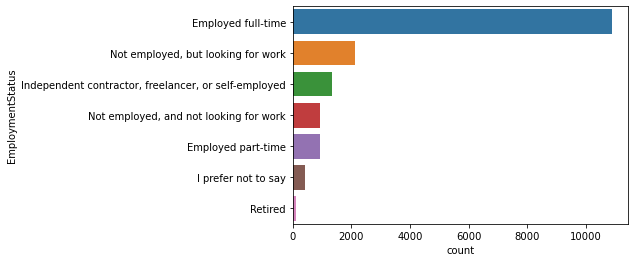

In [20]:
sns.countplot(y='EmploymentStatus', data=mcr, order=mcr['EmploymentStatus'].value_counts().index)

Index(['1 to 2 years', '3 to 5 years', 'Less than a year',
       'More than 10 years', '6 to 10 years',
       'I don't write code to analyze data'],
      dtype='object')


<AxesSubplot:xlabel='count', ylabel='Tenure'>

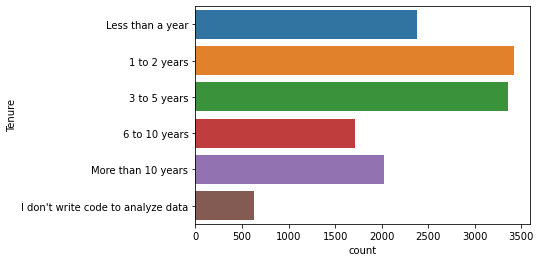

In [36]:
sns.countplot(y='Tenure', data=mcr, order=['Less than a year', '1 to 2 years', '3 to 5 years',
    '6 to 10 years', 'More than 10 years', "I don't write code to analyze data"])

The number of interviewees in Korea: 194


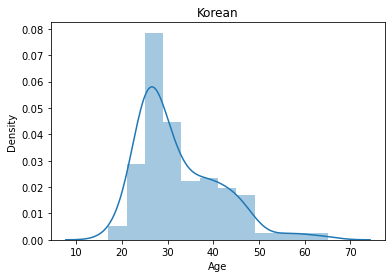

In [41]:
korea = mcr.loc[(mcr['Country']=='South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [42]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

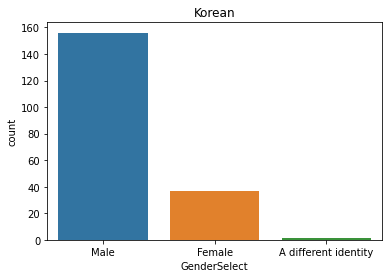

In [43]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

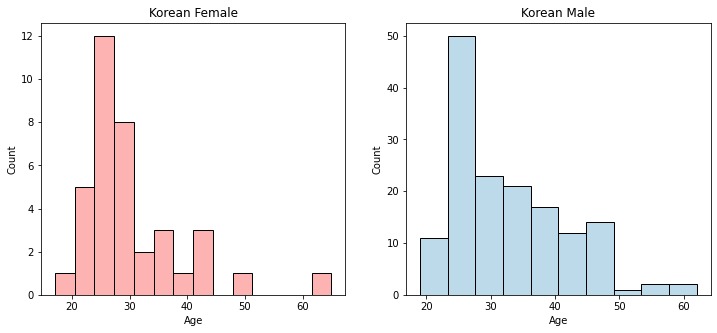

In [50]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.histplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            color=sns.color_palette("Paired")[4], ax=ax1)
ax1.set_title('Korean Female')

sns.histplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            color=sns.color_palette("Paired")[0], ax=ax2)
ax2.set_title('Korean Male')
plt.show()

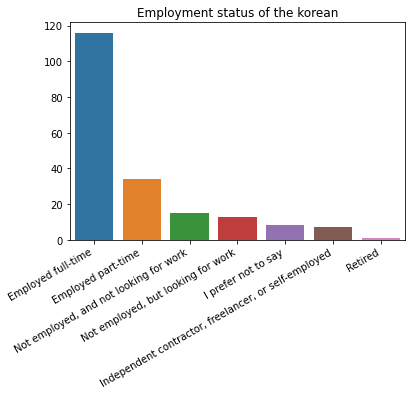

In [51]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts())
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

In [ ]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [ ]:
full_time = mcr.loc[(mcr['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcr.loc[(
    mcr['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

In [ ]:
sns.countplot(y='LanguageRecommendationSelect', data=mcr)

In [ ]:
sns.countplot(y=mcr['CurrentJobTitleSelect'])

In [ ]:
mcr[mcr['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

In [ ]:
data = mcr[(mcr['CurrentJobTitleSelect'].notnull()) & (
    (mcr['LanguageRecommendationSelect'] == 'Python') | (
        mcr['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect',
            hue='LanguageRecommendationSelect',
            data=data)

In [ ]:
mcr_ml_tool_count = pd.DataFrame(
    mcr['MLToolNextYearSelect'].value_counts())
mcr_ml_tool_percent = pd.DataFrame(
    mcr['MLToolNextYearSelect'].value_counts(normalize=True))
mcr_ml_tool_df = mcr_ml_tool_count.merge(
    mcr_ml_tool_percent,
    left_index=True,
    right_index=True).head(20)
mcr_ml_tool_df.columns = ['res cnt', 'ratio']
mcr_ml_tool_df

In [ ]:
data = mcr['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

In [ ]:
data = mcr['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [ ]:
mcr['LearningPlatformSelect'] = mcr['LearningPlatformSelect'].astype('str')
s = mcr.apply(
    lambda x : pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

In [ ]:
plt.figure(figsize=(6, 8))
data = s[s != 'nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

In [ ]:
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

In [ ]:
use_features = [x for x in mcr.columns if x.find('LearningPlatformUsefulness') != -1]

In [ ]:
fdf = {}
for feature in use_features:
    a = mcr[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values('Very useful', ascending=False), annot=True)

In [ ]:
fdf.plot(kind='bar', figsize=(20,8),
        title="Usefullness of Learning Platforms")

In [ ]:
cat_features = [x for x in mcr.columns if x.find('LearningCategory') != -1]
cat_features

In [ ]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcr[feature].mean()
cdf = pd.Series(cdf)
cdf

In [ ]:
plt.figure(facecolor='white')
plt.pie(cdf, labels=cdf.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

In [ ]:
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

In [ ]:
mcr[mcr['HardwarePersonalProjectsSelect'].notnull()][
    'HardwarePersonalProjectsSelect'].shape

In [ ]:
mcr['HardwarePersonalProjectsSelect'] = mcr['HardwarePersonalProjectsSelect'].astype('str').apply(
    lambda x: x.split(','))
s = mcr.apply(lambda x: pd.Series(x['HardwarePersonalProjectsSelect']), axis=1).stack(
).reset_index(level=1, drop=True)
s.name = 'hardware'

In [ ]:
s = s[s != 'nan']

In [ ]:
pd.DataFrame(s.value_counts())

In [ ]:
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying', data=mcr, hue='EmploymentStatus').legend(
   loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', data=full_time, hue='EmploymentStatus', ax=ax1).legend(
    loc='center right', bbox_to_anchor=(1, 0.5))
sns.countplot(x='TimeSpentStudying', data=looking_for_job, hue='EmploymentStatus', ax=ax2).legend(
    loc='center right', bbox_to_anchor=(1, 0.5))

In [ ]:
mcr['BlogsPodcastsNewslettersSelect'] = mcr['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcr['BlogsPodcastsNewslettersSelect'].head()

In [ ]:
s = mcr.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
            axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

In [ ]:
s = s[s != 'nan'].value_counts().head(20)

In [ ]:
plt.figure(figsize=(6,8))
plt.title('Most Popular Blogs and Podcasts')
sns.barplot(y=s.index, x=s)